In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Conv2D
from keras import layers
import keras

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
X_train /= 255
X_test /= 255

In [9]:
from keras.utils import np_utils
n_class = 10
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [10]:
k1_number = 32
k2_number = 64
k3_number = 128
k_size = (3, 3)
p_size = (2, 2)

In [11]:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D
# https://keras.io/api/layers/pooling_layers/max_pooling2d/

keras.backend.clear_session()
model = Sequential()
sample_shape = (28, 28, 1)
model.add(Conv2D(k1_number, kernel_size = k_size, padding = 'same', strides = (1, 1), activation = 'relu', input_shape = sample_shape))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size = p_size, strides = (2,2)))
model.add(Conv2D(k2_number, kernel_size = k_size, padding = 'same', strides = (1, 1), activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size = p_size, strides = (2,2)))
model.add(Conv2D(k3_number, kernel_size = k_size, padding = 'same', strides = (1, 1), activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size = p_size, strides = (2,2)))
model.add(layers.Flatten())

In [12]:
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation = 'softmax'))

In [13]:
optimizer = keras.optimizers.Adam(lr = 0.001)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [15]:
model.compile(optimizer=keras.optimizers.Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
result = model.fit(X_train, Y_train, batch_size = 64, epochs = 10, validation_data = (X_test, Y_test))

Epoch 1/10
938/938 [==============================] - 189s 198ms/step - loss: 0.1855 - accuracy: 0.9458 - val_loss: 0.0402 - val_accuracy: 0.9871
Epoch 2/10
938/938 [==============================] - 185s 197ms/step - loss: 0.0304 - accuracy: 0.9906 - val_loss: 0.0424 - val_accuracy: 0.9871
Epoch 3/10
938/938 [==============================] - 181s 193ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0447 - val_accuracy: 0.9859
Epoch 4/10
938/938 [==============================] - 181s 193ms/step - loss: 0.0193 - accuracy: 0.9934 - val_loss: 0.0294 - val_accuracy: 0.9911
Epoch 5/10
938/938 [==============================] - 182s 194ms/step - loss: 0.0130 - accuracy: 0.9957 - val_loss: 0.0304 - val_accuracy: 0.9909
Epoch 6/10
938/938 [==============================] - 182s 194ms/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.0270 - val_accuracy: 0.9922
Epoch 7/10
938/938 [==============================] - 183s 195ms/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0282 -

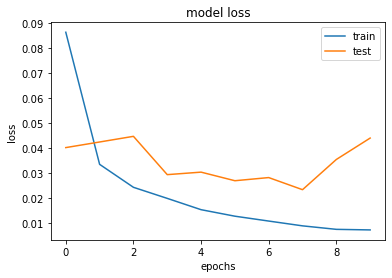

In [17]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])

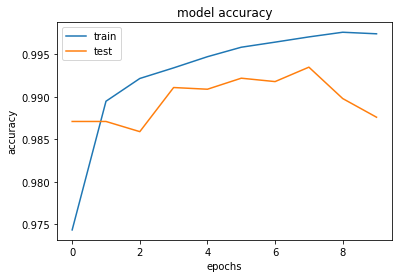

In [18]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])